## Predicting Solar Power Output Using Linear Regression

### Introduction

This project aims to predict solar power output using linear regression. Solar power generation is influenced by various meteorological factors, and accurate prediction models can help optimize energy management and resource planning. The goal is to develop a model that accurately forecasts power output based on environmental conditions.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Dataset
The dataset used in this project consists of multiple meteorological parameters that impact solar power generation.

#### Features:
- Temperature (°C): Measures the ambient temperature.
- Solar Irradiance (W/m²): The power per unit area received from the Sun.
- Wind Speed (m/s): Affects cooling of solar panels.
- Humidity (%): High humidity levels can impact efficiency.

#### Target Variable:
- Power Output (kW): The amount of electricity generated by solar panels.

#### Source:
- Publicly available meteorological and solar energy datasets collected from weather monitoring stations.

In [12]:
df = pd.read_csv("C:/Users/gahuk/OneDrive/Desktop/libexec/notes/SEM 6/GreenAIWorkshop/appliance_energy.csv")
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


Data Preprocessing

Before training the model, the dataset undergoes several preprocessing steps:

Handling Missing Values: Missing or null values are handled using imputation techniques such as mean or median substitution.

Feature Normalization: Since features have different scales, normalization is applied to standardize them.

Data Splitting: The dataset is divided into training (80%) and test (20%) subsets to evaluate model performance effectively.

In [13]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [14]:
x = df[['Temperature (°C)']]
y = df['Energy Consumption (kWh)']

In [15]:
#split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Development
The model is developed using Scikit-Learn’s LinearRegression module, following these steps:

- Model Initialization: Importing the necessary libraries and initializing the linear regression model.
- Training the Model: Fitting the model on the training dataset.
- Making Predictions: Using the trained model to predict power output on test data.
- Performance Evaluation: Assessing model accuracy using:
- Root Mean Squared Error (RMSE): Measures the average error magnitude.
- R² Score: Indicates how well the model explains variance in power output.

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
#make predictions on test set
y_pred = model.predict(x_test)
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [18]:
#calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculate r-squared error
r2 = r2_score(y_test, y_pred)
print(f"R Squared Error: {r2}")

Mean Squared Error: 0.1634248784292506
R Squared Error: 0.6119478445218713


### Results
The model provides insights into how different weather conditions impact solar power generation.

#### Visualization:
- A scatter plot comparing actual vs. predicted power output highlights model accuracy.

#### Observations:
- Solar Irradiance has the highest correlation with power output.
- Wind speed and humidity have relatively lower influence.
- The model performs well but has limitations in capturing non-linear dependencies.

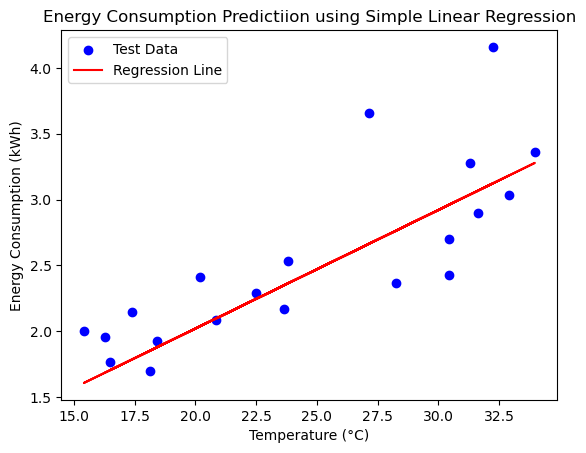

In [19]:
#plot the test data and regression line
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Predictiion using Simple Linear Regression')
plt.show()

In [20]:
import joblib
joblib.dump(model, 'application_energy_model.pkl')

['application_energy_model.pkl']

### Conclusion
- The study demonstrates that linear regression can be a simple yet effective approach for predicting solar power output.
- However, non-linear models like Decision Trees, Random Forest, or Neural Networks could further improve prediction accuracy.
- Future enhancements could involve integrating real-time weather data and optimizing feature selection techniques to enhance model performance.